In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "kaggle/input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import zipfile
import os
import torch
from torchvision import transforms, datasets, models
from torch import optim, cuda
from torch.utils.data import DataLoader

from PIL import Image

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Preprocessing

In [5]:
extraction_path = '/kaggle/input/dstoprocess/'
train_dir = extraction_path + 'dsToProcess/train/'
val_dir = extraction_path + 'dsToProcess/val/'
test_dir = extraction_path + 'dsToProcess/test/'

#Ambiente su cui fare running
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Run on GPU')
else:
    device = torch.device("cpu")
    
    
#Data PreProcessing e Augmentation
image_transforms = {
        'train':
        transforms.Compose([
            transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            #transforms.Normalize(mean, std)
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Imagenet standards
        ]),
        'val':
        transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            #transforms.Normalize(mean, std)
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'test':
        transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            #transforms.Normalize(mean, std)
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

#Datasets per ogni categoria
data = {
    'train':
    datasets.ImageFolder(root=train_dir, transform=image_transforms['train']),
    'val':
    datasets.ImageFolder(root=val_dir, transform=image_transforms['val']),
    'test':
    datasets.ImageFolder(root=test_dir, transform=image_transforms['test'])
}

#Dataloader iterators
batch_size = 16
train_loader = DataLoader(data['train'], batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(data['val'], batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data['test'], batch_size=batch_size, shuffle=True)

print(train_loader.dataset.classes, len(train_loader.dataset.classes))
print(valid_loader.dataset.classes, len(valid_loader.dataset.classes))
print(test_loader.dataset.classes, len(test_loader.dataset.classes))

print(len(train_loader.dataset))
print(len(valid_loader.dataset))
print(len(test_loader.dataset))

Run on GPU
['bacon', 'banana', 'bread', 'broccoli', 'butter', 'carrots', 'cheese', 'chicken', 'cucumber', 'eggs', 'fish', 'lettuce', 'milk', 'onions', 'peppers', 'potatoes', 'sausages', 'spinach', 'tomato', 'yogurt'] 20
['bacon', 'banana', 'bread', 'broccoli', 'butter', 'carrots', 'cheese', 'chicken', 'cucumber', 'eggs', 'fish', 'lettuce', 'milk', 'onions', 'peppers', 'potatoes', 'sausages', 'spinach', 'tomato', 'yogurt'] 20
['bacon', 'banana', 'bread', 'broccoli', 'butter', 'carrots', 'cheese', 'chicken', 'cucumber', 'eggs', 'fish', 'lettuce', 'milk', 'onions', 'peppers', 'potatoes', 'sausages', 'spinach', 'tomato', 'yogurt'] 20
10000
5000
5000


# Esempio

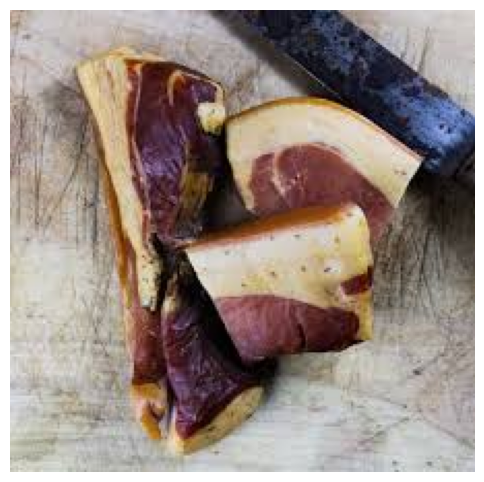

In [6]:
import matplotlib.pyplot as plt

def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

image = Image.open(train_dir + '/bacon/' + 'bacon.1.jpg')
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.show();

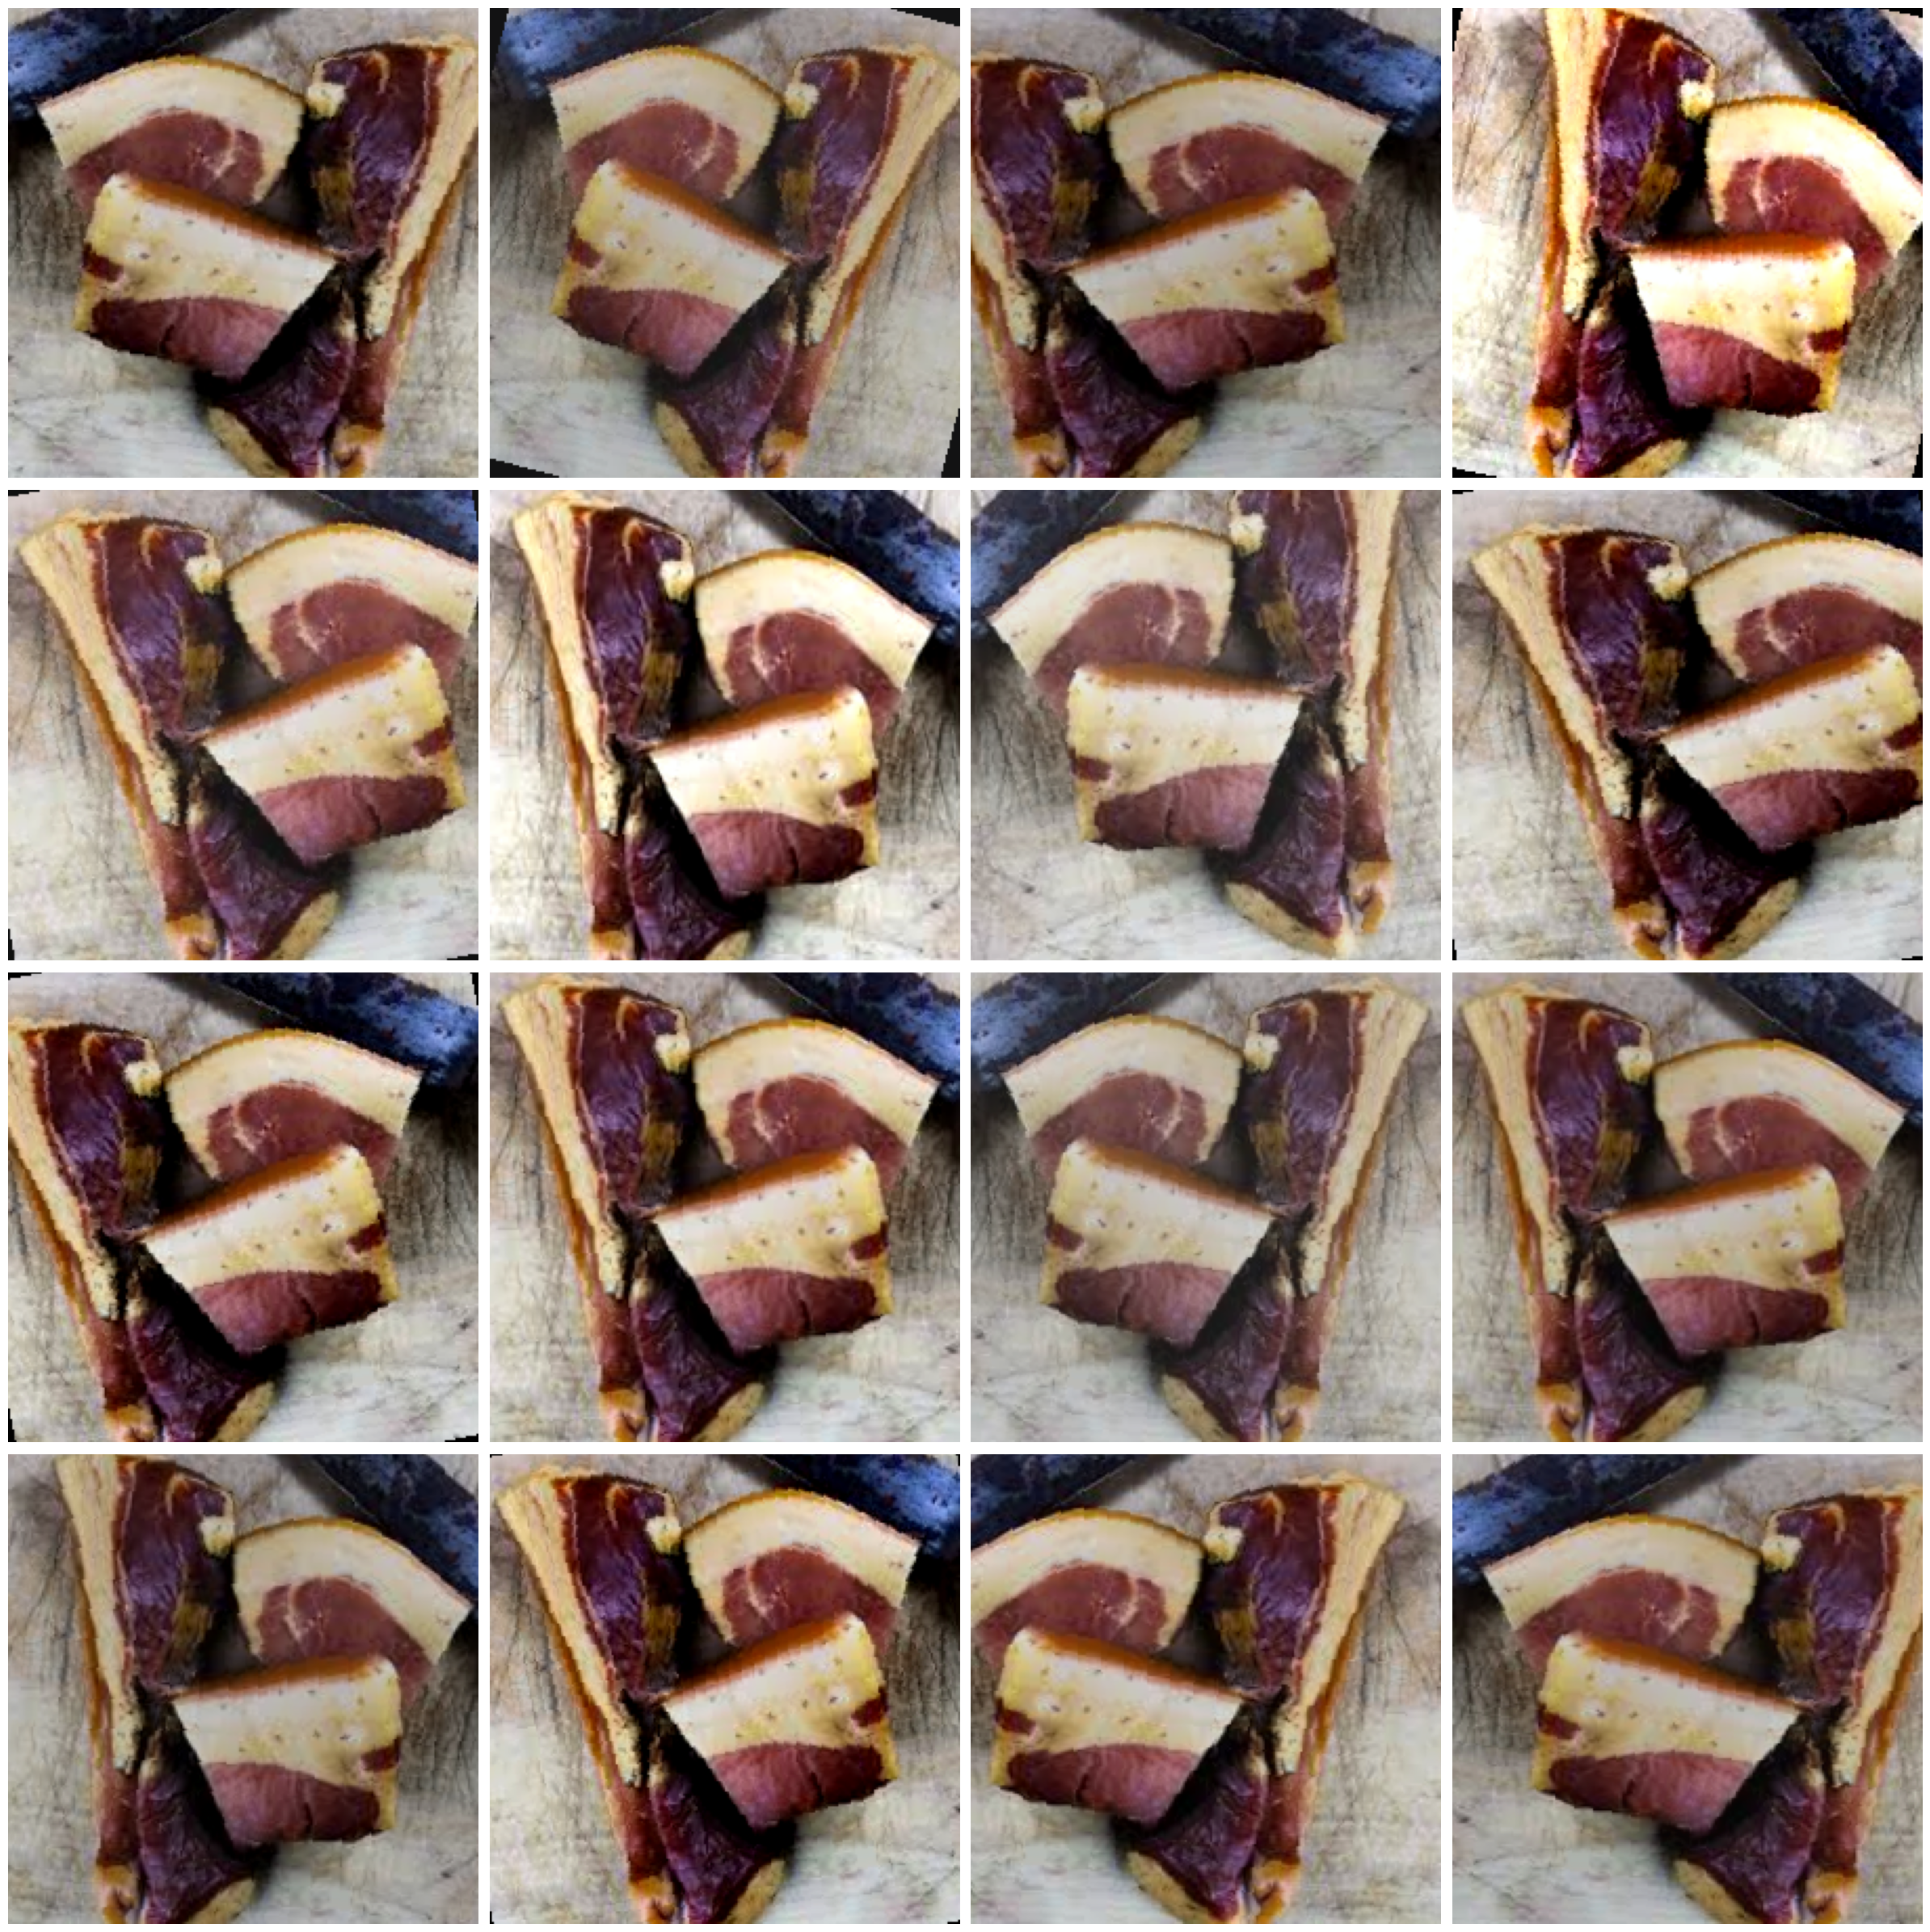

In [7]:
image = Image.open(train_dir + '/bacon/' + 'bacon.1.jpg')
t = image_transforms['train']
plt.figure(figsize=(24, 24))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(image), ax=ax)

plt.tight_layout();